 **Title: Relating Gross Domestic Product and Life Expectancy to COVID-19 Cases and Deaths** 
 
 
**Introduction:**

Since late 2019, SARS-CoV-2 has been circulating and infecting people worldwide. This pandemic has brought with it innumerable effects to our societies. Individual nations responded to this pandemic in different ways based on political inclinations, development, and available resources. Two important factors to consider when comparing country responses are life expectancies and Gross Domestic Products (GDP). The life expectancy for a particular country is defined as the average number of years someone is expected to live. A country’s GDP is defined as the “total market value of the goods and services produced by a country’s economy during a period of time” (Bodarenko, 2017), used as a measure of a country’s economy. These factors may be indicative of a nation’s capacity to manage crises, such as the COVID-19 pandemic, and help predict health outcomes. One way to see how well a nation has been able to deal with the pandemic is by tracking how many cases it has had. With this in mind, the question can a country’s GDP and life expectancy be used to predict how many total SARS-CoV-2 cases will have? is raised. This investigation will be conducted using data on coronavirus statistics reported daily from the University of Oxford.

**Methods:**

From the data set, the analysis will use the columns: Date, Total Cases, Location, Cases per Million, Total deaths, Total Deaths per million, Life expectancy, GDP per Capita, and Human Development Index. Since the data set (and total case counts) are updated daily, only use data available from the start of reporting up to February 28th, 2022 will be used. Further, the analysis will be limited to only North American countries. Data entries containing NA values will be searched online and manually added. From this data frame, the tidied data will be used to visualize the correlation between GDP, life expectancy, and case/death numbers. After the visualization step, a regression model can be applied to make predictions about the relationship between GDP and life expectancy, and COVID-19 rates. 

**Expected outcomes and significance:**

Through this data exploration, the relationship between a country's GDP and life expectancy, and COVID-19 cases or deaths experienced will be investigated. Whether these factors are predictive of a country’s COVID-19 cases/deaths will be determined. This data could be used as a model for how resources and aid are distributed between countries if another pandemic were to arise. For example, if a strong negative relationship between GDP and COVID-19 cases/deaths is discovered, it could be recommended that more aid be allocated to lower GDP countries. 
This exploration is only a small step in recognizing patterns between socioeconomic factors and health: prompting multiple questions about how exactly GDP and life expectancy are related to how a country may handle a pandemic. For example: does the distribution of GDP funds play a stronger role than the total amount of funding?


**Citation**

Bondarenko, P. (2017, February 28). gross domestic product. Encyclopedia Britannica. https://www.britannica.com/topic/gross-domestic-product 



In [2]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
covid_data <- read_csv("data/owid-covid-data.csv")
# covid_data

Parsed with column specification:
cols(
  .default = col_double(),
  iso_code = col_character(),
  continent = col_character(),
  location = col_character(),
  date = col_date(format = ""),
  icu_patients = col_logical(),
  icu_patients_per_million = col_logical(),
  hosp_patients = col_logical(),
  hosp_patients_per_million = col_logical(),
  weekly_icu_admissions = col_logical(),
  weekly_icu_admissions_per_million = col_logical(),
  weekly_hosp_admissions = col_logical(),
  weekly_hosp_admissions_per_million = col_logical(),
  new_tests = col_logical(),
  new_tests_per_thousand = col_logical(),
  tests_units = col_character(),
  total_boosters = col_logical(),
  total_boosters_per_hundred = col_logical(),
  extreme_poverty = col_logical(),
  female_smokers = col_logical(),
  male_smokers = col_logical()
  # ... with 4 more columns
)

See spec(...) for full column specifications.

Warning message:
“644992 parsing failures.
 row                        col           expected  actual   

In [5]:
# FILTER RELEVANT COLS

# filtered_covid_data <- filter(covid_data, continent == "North America", date == "2022-02-28")
# relevant_covid_data <- filtered_covid_data %>% 
#             select(location, date, total_cases, total_cases_per_million, total_deaths, total_deaths_per_million, life_expectancy, 
#                    gdp_per_capita, human_development_index) %>% 
#             filter(!is.na(total_cases))
filtered_covid_data = filter(covid_data, date == "2022-02-28")
relevant_covid_data = filtered_covid_data %>% 
                        select(continent, location, date, total_cases, total_cases_per_million, total_deaths, total_deaths_per_million, life_expectancy, 
                               gdp_per_capita, human_development_index) %>% 
                        filter(!is.na(total_cases), !is.na(gdp_per_capita), !is.na(human_development_index), !is.na(total_deaths), 
                                !is.na(total_deaths_per_million), !is.na(continent))

# map(relevant_covid_data, ~sum(is.na(.)))
#Data without NA values
relevant_covid_data

continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,life_expectancy,gdp_per_capita,human_development_index
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asia,Afghanistan,2022-02-28,173659,4359.411,7598,190.735,64.83,1803.987,0.511
Europe,Albania,2022-02-28,271563,94524.622,3469,1207.476,78.57,11803.431,0.795
Africa,Algeria,2022-02-28,264936,5938.055,6835,153.194,76.88,13913.839,0.748
Africa,Angola,2022-02-28,98741,2909.829,1900,55.992,61.15,5819.495,0.581
North America,Antigua and Barbuda,2022-02-28,7437,75328.174,135,1367.393,77.02,21490.943,0.778
South America,Argentina,2022-02-28,8900656,195164.903,126152,2766.138,76.67,18933.907,0.845
Asia,Armenia,2022-02-28,419832,141446.730,8461,2850.618,75.09,8787.580,0.776
Oceania,Australia,2022-02-28,3235017,125445.547,5210,202.030,83.44,44648.710,0.944
Europe,Austria,2022-02-28,2679742,296330.937,14809,1637.607,81.54,45436.686,0.922


TABLE 1: Relevant Covid dataset that has been cleaned

In [6]:
# SUMMARY TABLE of AVERAGES

summary_table = relevant_covid_data %>% select(!c("date", "location", "continent"))

# COUNT NA VALUES
na_obs = summary_table %>% map(~sum(is.na(.)))

summary_table = summary_table %>% 
                    map_df(mean, na.rm=TRUE)
summary_table = summary_table %>% 
                pivot_longer(cols = total_cases:human_development_index,
                            names_to = "Predictors",
                            values_to = "Average")

summary_table = summary_table %>% 
                mutate(na_observations = na_obs)

options(scipen = 999)
# The summary table provides information on the averages of each of the numeric columns as well as the 
# amount of missing values from each column.

summary_table

Predictors,Average,na_observations
<chr>,<dbl>,<named list>
total_cases,2417817.6277778,0
total_cases_per_million,107868.4631611,0
total_deaths,32991.0000000,0
total_deaths_per_million,1096.6346833,0
life_expectancy,72.6219444,0
gdp_per_capita,18398.3111500,0
human_development_index,0.7217889,0


TABLE 2: Summary table of relevant covid data

In [58]:
set.seed(2000)
# SPLITTING DATA INTO TRAINING AND TESTING SETS

covid_data_split = initial_split(relevant_covid_data, prop = 0.65, strata = total_cases_per_million)
covid_train = training(covid_data_split)
covid_test = testing(covid_data_split)

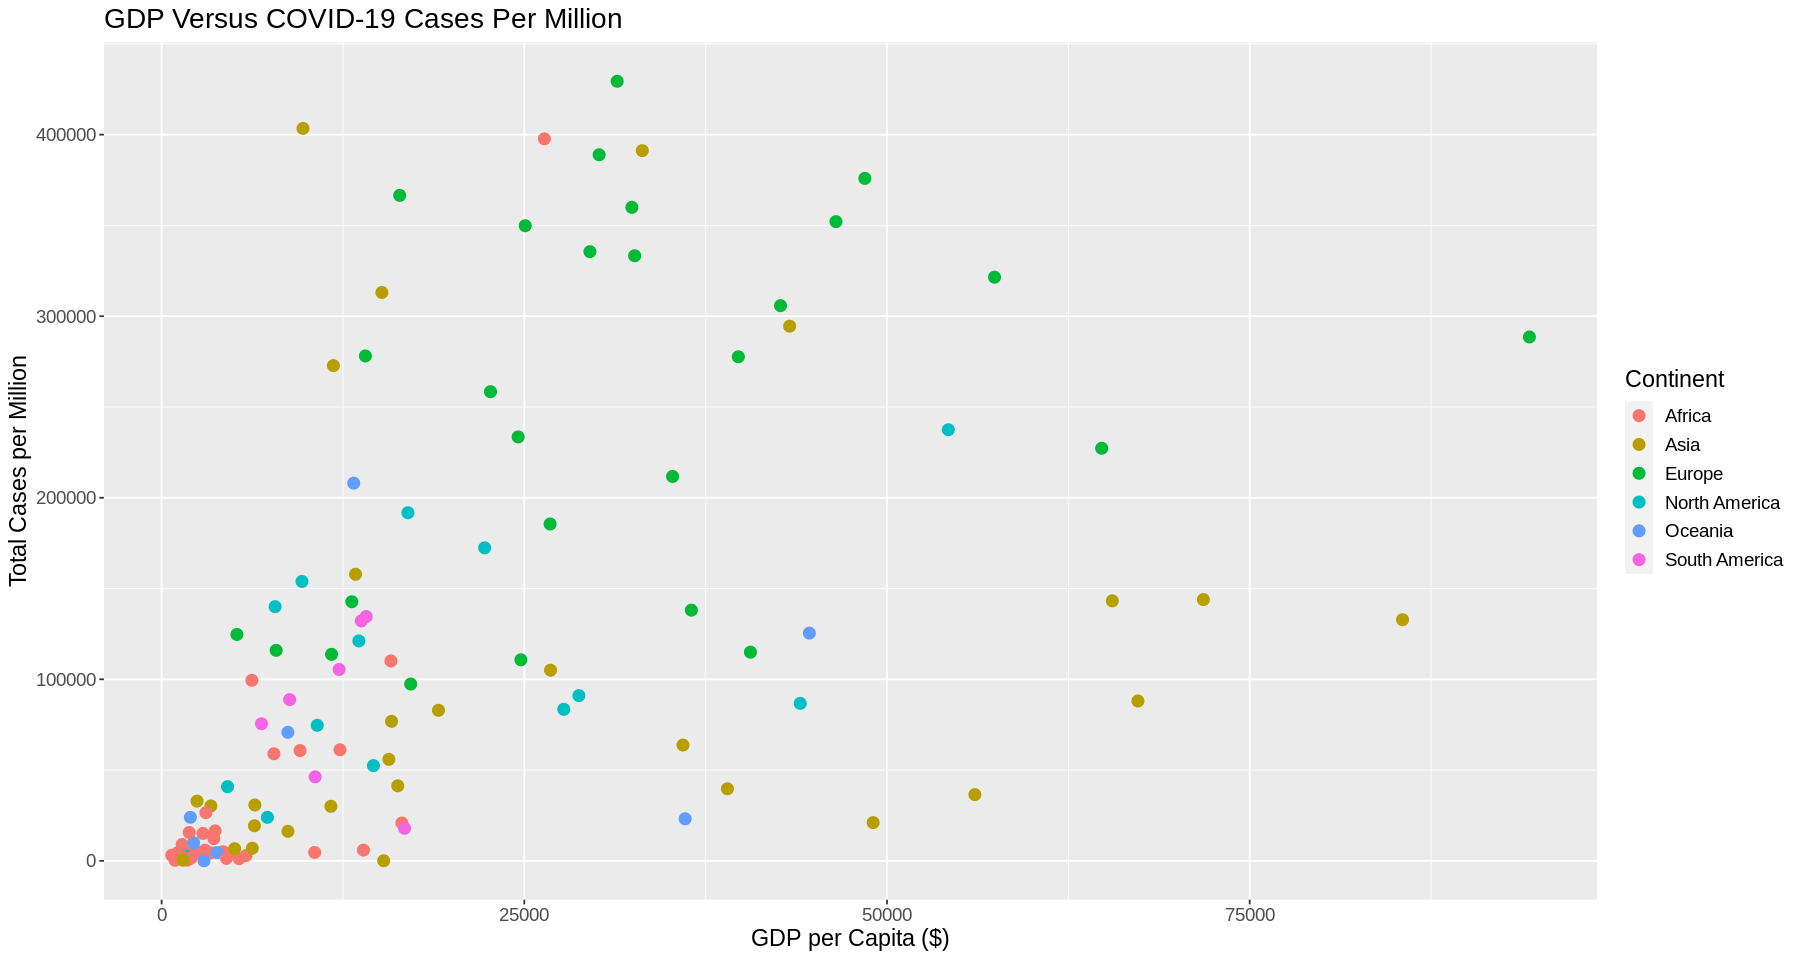

In [59]:
#resize
options(repr.plot.width = 15, repr.plot.height = 8)
#GDP plot of total cases per million and GDP per capita
proposal_plot_GDP_to_Covid_rates <- covid_train %>% 
                    ggplot(aes(x = gdp_per_capita, y = total_cases_per_million, color = continent)) + geom_point(size = 3) +
                    labs(x = "GDP per Capita ($)", y = "Total Cases per Million", color = "Continent") +
                    ggtitle("GDP Versus COVID-19 Cases Per Million") +
                    theme(text = element_text(size = 14))
proposal_plot_GDP_to_Covid_rates

FIGURE 1.1: Plot of Total Covid Cases per Million vs GDP per Capita of Countries

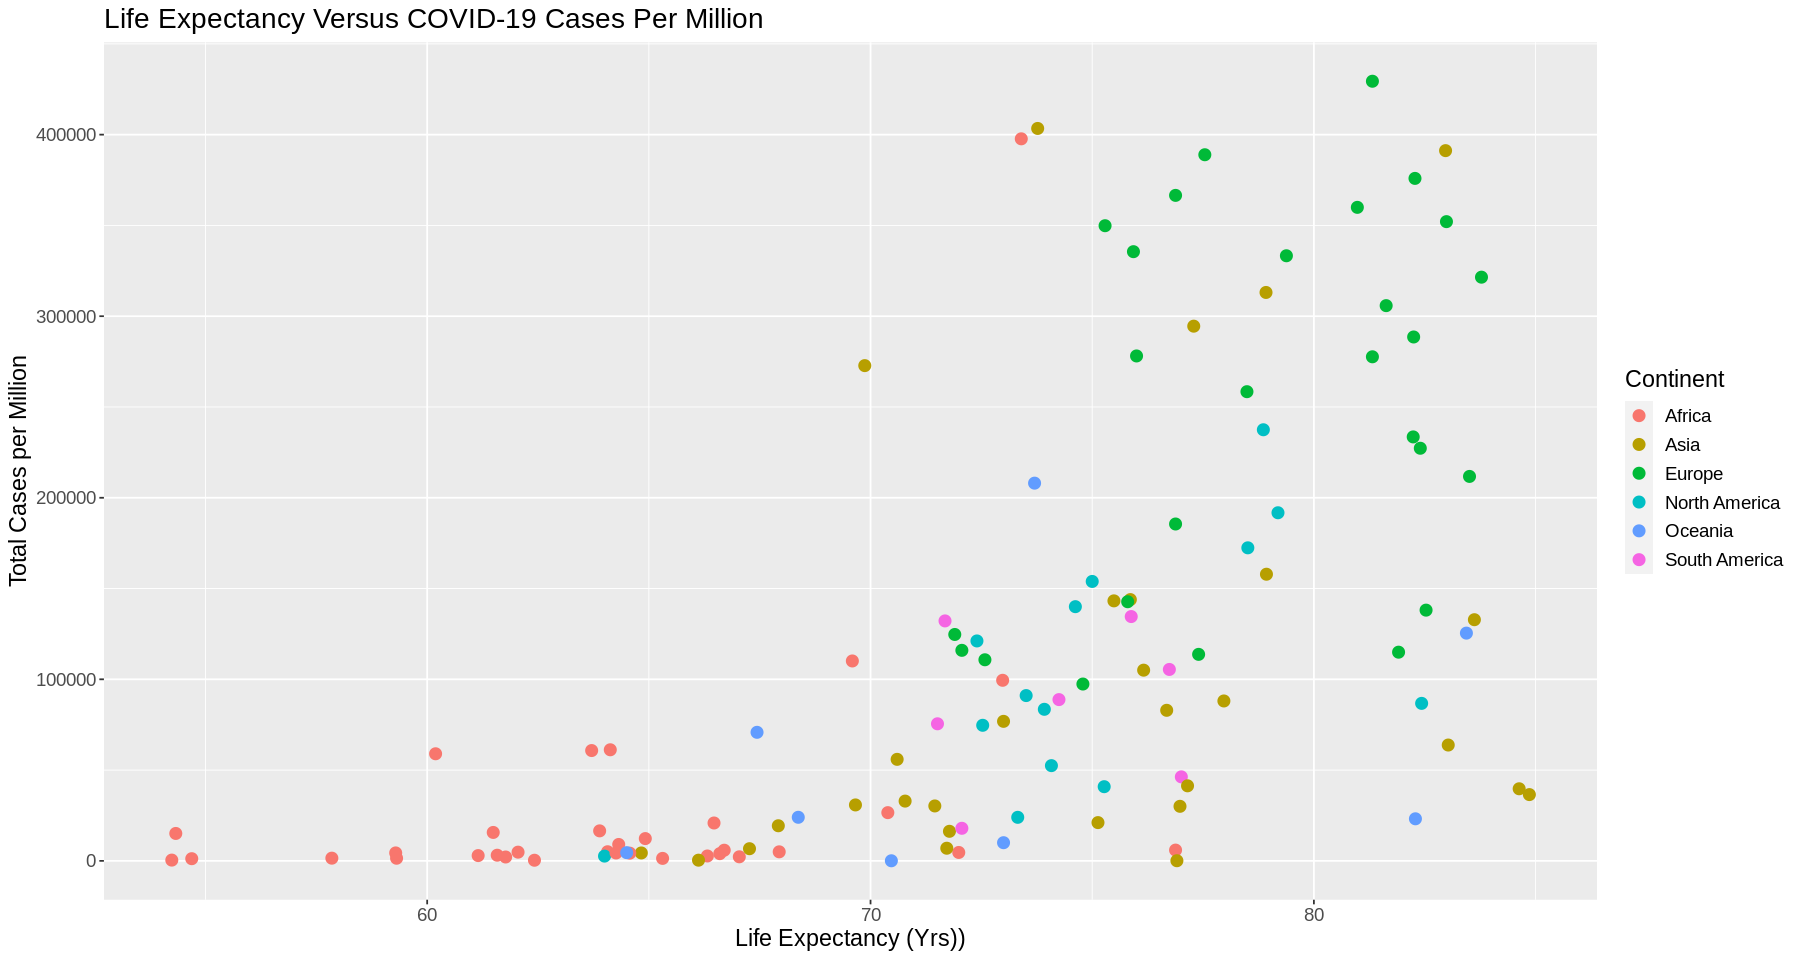

In [60]:
# Life Expectancy vs Total Cases per Million plot
proposal_plot_Life_Expectancy_to_Covid_rates <- covid_train %>% 
                    ggplot(aes(x = life_expectancy, y = total_cases_per_million, color = continent)) + geom_point(size = 3) +
                    labs(x = "Life Expectancy (Yrs))", y = "Total Cases per Million", color = "Continent") +
                    ggtitle("Life Expectancy Versus COVID-19 Cases Per Million") +
                    theme(text = element_text(size = 14))
proposal_plot_Life_Expectancy_to_Covid_rates

FIGURE 1.2: Plot of Total Covid Cases per Million vs. Life Expectancy of people

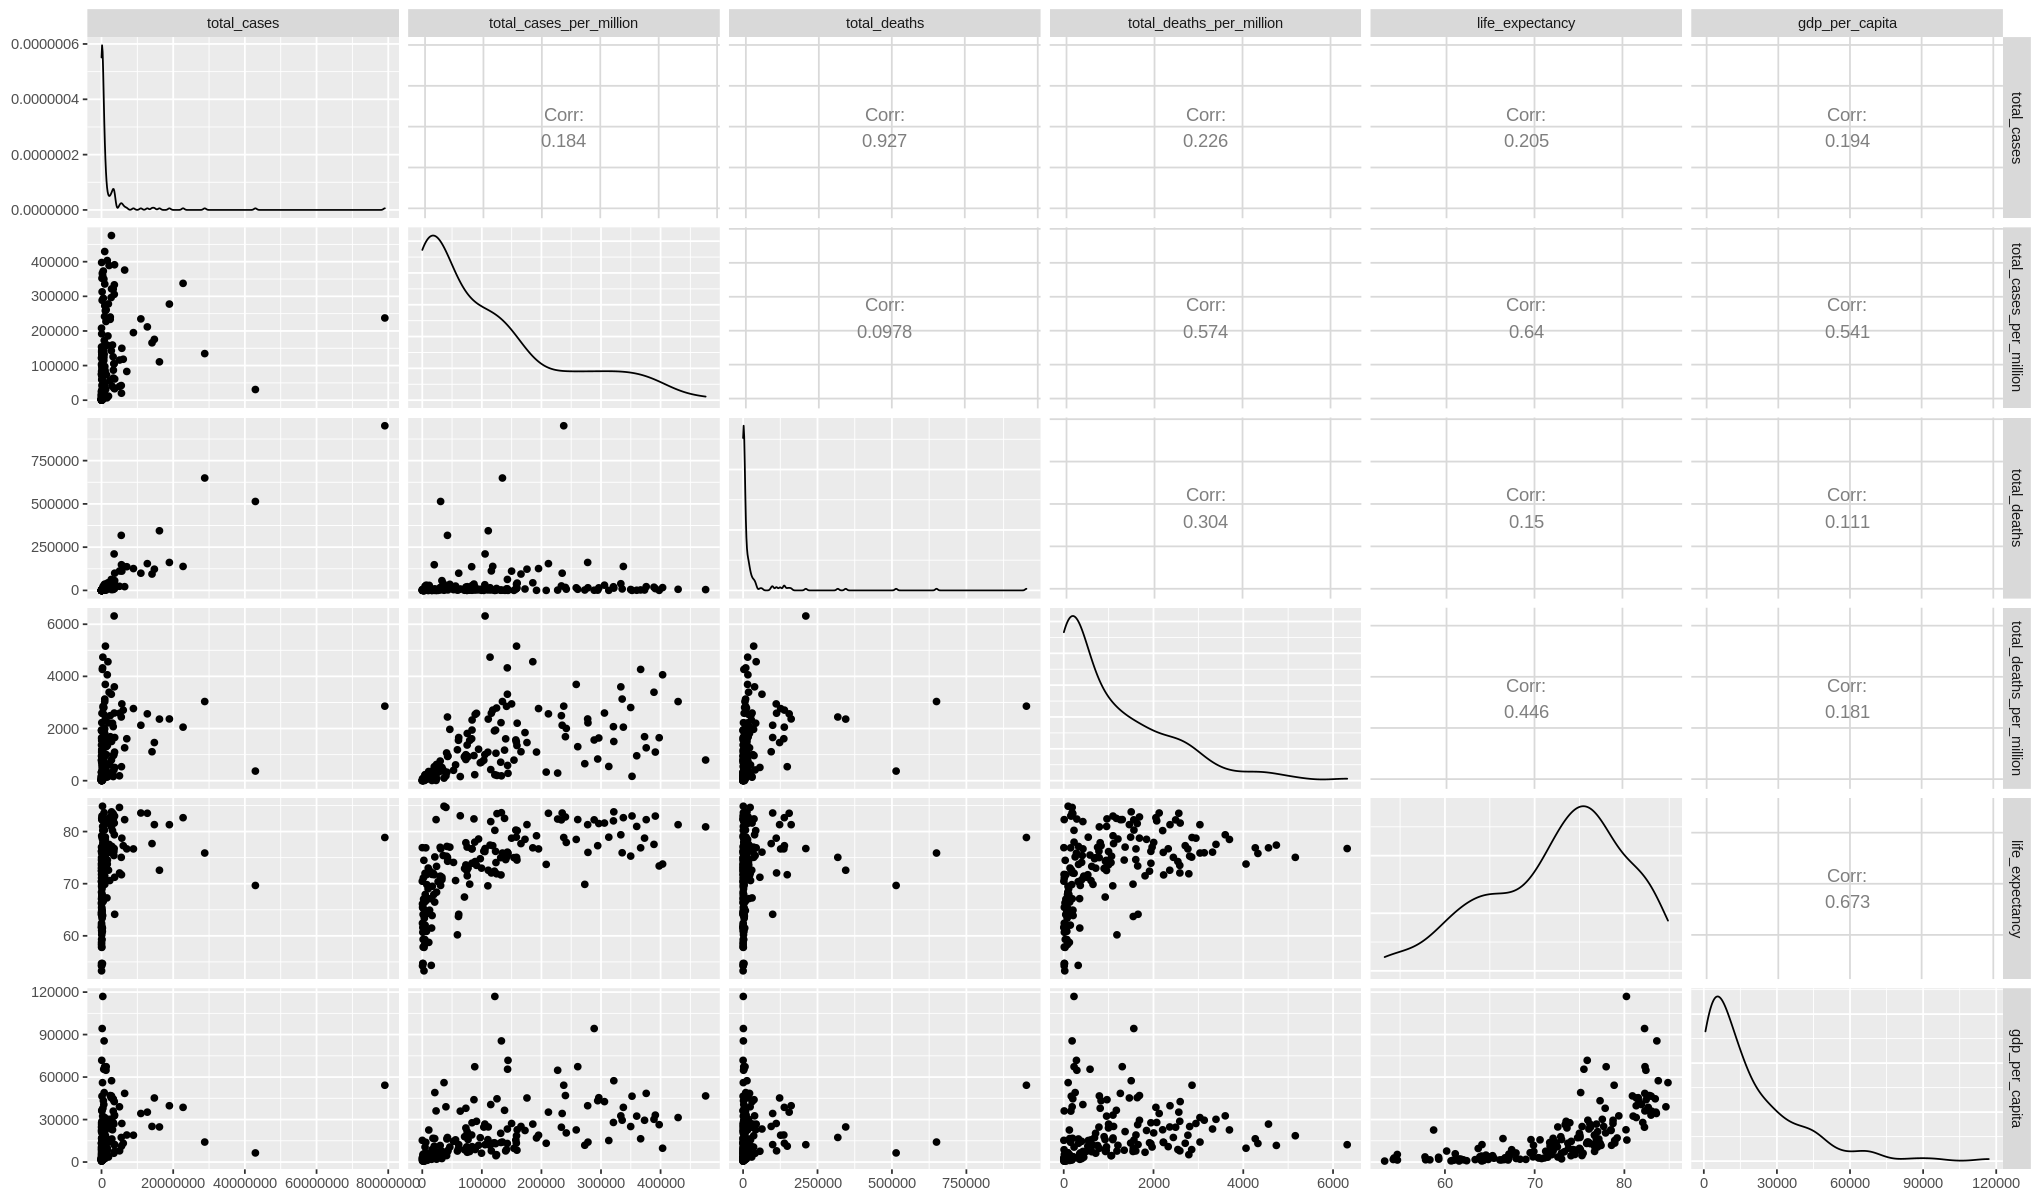

In [61]:
options(repr.plot.width = 17, repr.plot.height = 10)

# Checking the correlation between different predictors 
covid_eda = relevant_covid_data %>% 
            ggpairs(columns = 4:9)
covid_eda

FIGURE 1.3: Correlation plot of different predictors

In [62]:
set.seed(1234)
# Model Spec to pick the optimal neighbors, here we are using knn linear regression
covid_data_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
                    set_engine("kknn") %>% 
                    set_mode("regression")

covid_data_spec_le = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
                    set_engine("kknn") %>% 
                    set_mode("regression")

# Creating a recipe where we try to predict the total_cases_per_million using the gdp_per_capita as a predictor.
# We also scale and center all predictors
covid_recipe = recipe(total_cases_per_million ~ gdp_per_capita, data = covid_train) %>% 
                step_scale(all_predictors()) %>% 
                step_center(all_predictors())

covid_recipe_le = recipe(total_cases_per_million ~ life_expectancy, data = covid_train) %>% 
                    step_scale(all_predictors()) %>% 
                    step_center(all_predictors())

In [63]:
set.seed(1234)

# Creating a workflow with our recipe and spec model so we can use cross-validation to pick an optimal neighbor (k) value.
covid_workflow = workflow() %>% 
            add_recipe(covid_recipe) %>% 
            add_model(covid_data_spec)

covid_workflow_le = workflow() %>% 
                    add_recipe(covid_recipe_le) %>% 
                    add_model(covid_data_spec_le)

covid_vfold = vfold_cv(covid_train, v = 5, strata = total_cases_per_million)

In [64]:
set.seed(5678)
grid_vals = tibble(neighbors = seq(from = 1, to = 70))
covid_result = covid_workflow %>% 
                tune_grid(resamples = covid_vfold, grid = grid_vals) %>% 
                collect_metrics()

covid_result_le = covid_workflow_le %>% 
                tune_grid(resamples = covid_vfold, grid = grid_vals) %>% 
                collect_metrics()

In [65]:
set.seed(5679)

# Pull the k value that gives us the best mean value
k_min = covid_result %>% 
        filter(.metric == "rmse") %>% 
        arrange(mean) %>% 
        slice(1) %>% pull(1)

k_min_le = covid_result_le %>% 
            filter(.metric == "rmse") %>% 
            arrange(mean) %>% 
            slice(1) %>% pull(1)
k_min_le
k_min

[1] 33

[1] 26

In [68]:
set.seed(1234)

# We got our optimal k value, so we create a best spec with our new k.
covid_best_spec = nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
                    set_engine("kknn") %>% 
                    set_mode("regression")

covid_best_spec_le = nearest_neighbor(weight_func = "rectangular", neighbors = k_min_le) %>% 
                        set_engine("kknn") %>% 
                        set_mode("regression")

# Create a best fit workflow with our new spec and pass in the training data.
covid_best_fit = workflow() %>% 
                    add_recipe(covid_recipe) %>% 
                    add_model(covid_best_spec) %>% 
                    fit(data = covid_train)

covid_best_fit_le = workflow() %>% 
                    add_recipe(covid_recipe_le) %>% 
                    add_model(covid_best_spec_le) %>% 
                    fit(data = covid_train)

covid_summary = covid_best_fit %>% 
                predict(covid_test) %>% 
                bind_cols(covid_test) %>% 
                metrics(truth = total_cases_per_million, estimate = .pred) %>% 
                filter(.metric == "rmse")

covid_summary_le = covid_best_fit_le %>% 
                    predict(covid_test) %>% 
                    bind_cols(covid_test) %>% 
                    metrics(truth = total_cases_per_million, estimate = .pred) %>% 
                    filter(.metric == "rmse")
covid_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,68956.27


TABLE 3: RMSE estimate table for predictor gdp_per_capita

In [69]:
covid_summary_le

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,71772.76


TABLE 4: RMSE estimate table for predictor life_expectancy

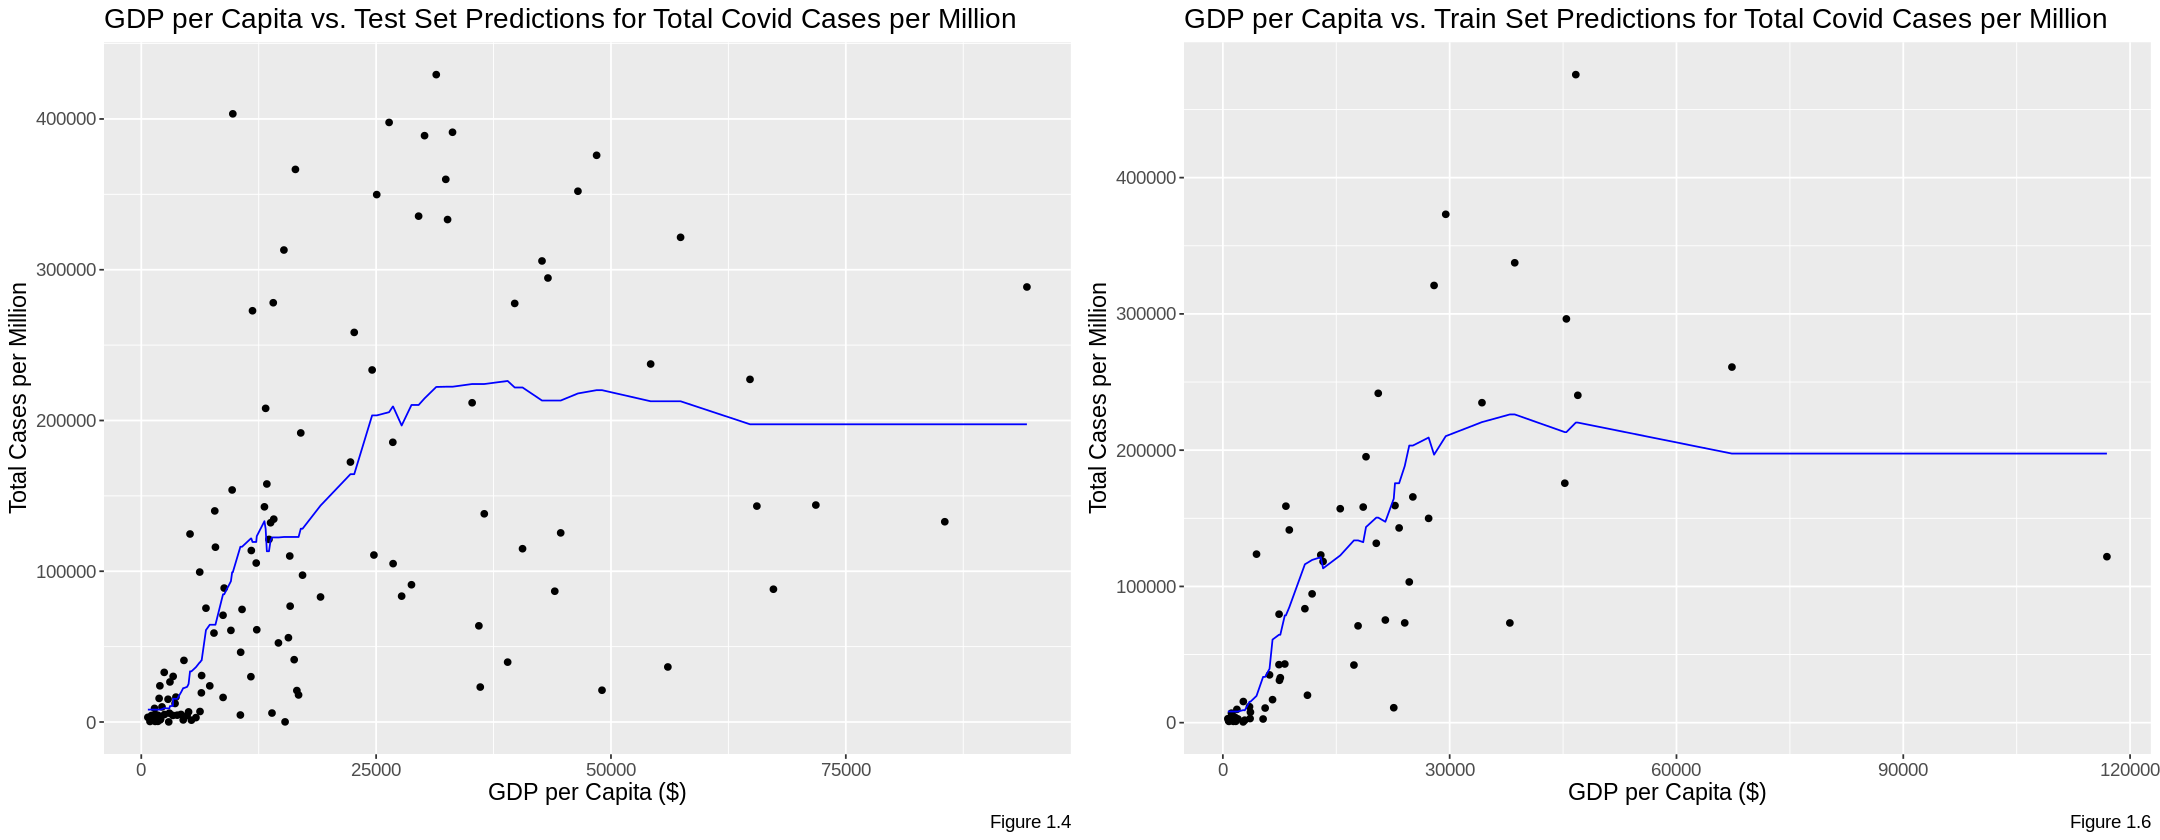

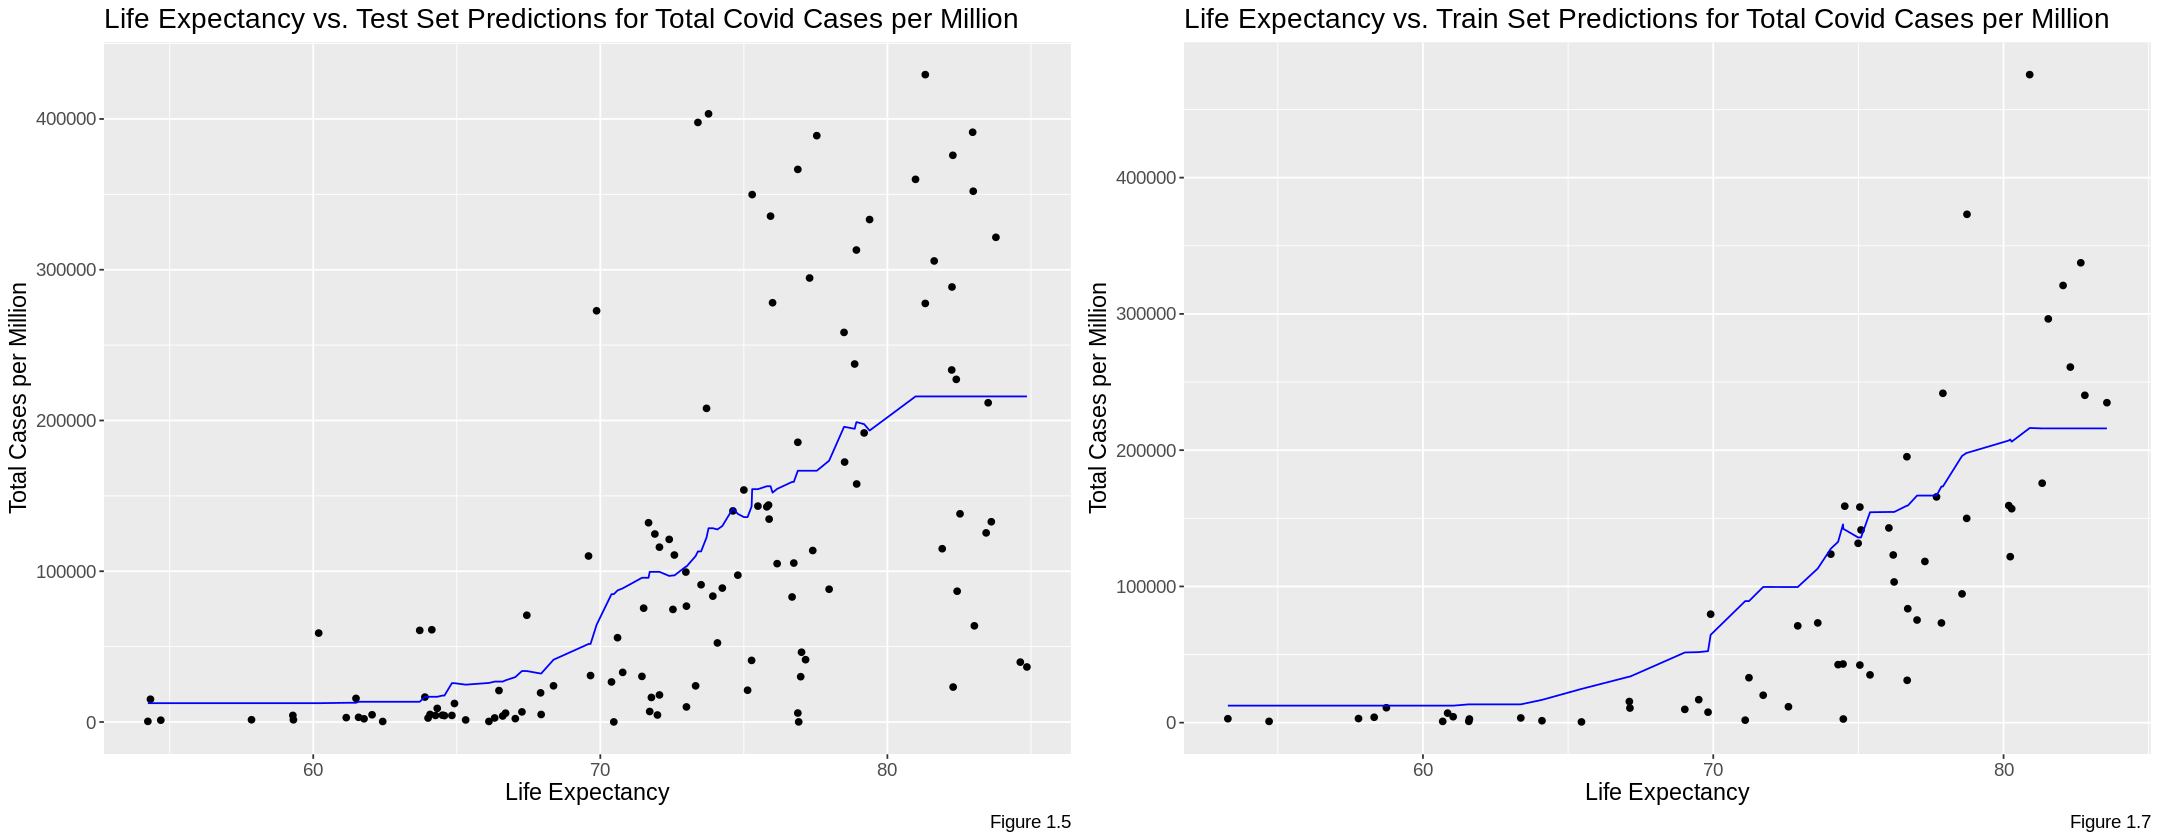

In [72]:
set.seed(5678)
options(repr.plot.width = 18, repr.plot.height = 7)
require(gridExtra)

# Using the best fit spec we found to predict for the training data. 
# We are training our model on both the gdp_per_capita and life_expectancy predictors
covid_train_temp = covid_best_fit %>% 
             predict(covid_train) %>% 
             bind_cols(covid_train)

covid_train_temp_le = covid_best_fit_le %>% 
                        predict(covid_train) %>% 
                        bind_cols(covid_train)

covid_training_predictions = covid_train %>% 
                    mutate(.pred = covid_train_temp$.pred)

covid_training_predictions_le = covid_train %>% 
                                mutate(.pred = covid_train_temp_le$.pred)


# PLOTS for predictors gdp_per_capita and life_expectancy on the train data.
covid_train_plot = ggplot(covid_train, aes(x = gdp_per_capita, y = total_cases_per_million)) +
             geom_point() +
             geom_line(data = covid_training_predictions,
                       mapping = aes(x = gdp_per_capita, y = .pred),
                       color = "blue") +
            labs(x = "GDP per Capita ($)", y = "Total Cases per Million", caption = "Figure 1.4") +
            ggtitle("GDP per Capita vs. Test Set Predictions for Total Covid Cases per Million") +
            theme(text = element_text(size = 14))

covid_train_plot_le = ggplot(covid_train, aes(x = life_expectancy, y = total_cases_per_million)) +
             geom_point() +
             geom_line(data = covid_training_predictions_le,
                       mapping = aes(x = life_expectancy, y = .pred),
                       color = "blue") +
            labs(x = "Life Expectancy", y = "Total Cases per Million", caption = "Figure 1.5") +
            ggtitle("Life Expectancy vs. Test Set Predictions for Total Covid Cases per Million") +
            theme(text = element_text(size = 14))

# Using the best fit spec we found to predict for the training data. 
covid_test_temp = covid_best_fit %>% 
             predict(covid_test) %>% 
             bind_cols(covid_test)

covid_test_temp_le = covid_best_fit_le %>% 
                    predict(covid_test) %>% 
                    bind_cols(covid_test)

covid_testing_predictions = covid_test %>% 
                        mutate(.pred = covid_test_temp$.pred)

covid_testing_predictions_le = covid_test %>% 
                                mutate(.pred = covid_test_temp_le$.pred)

# PLOTS for predictors gdp_per_capita and life_expectancy on the test data.
covid_test_plot = ggplot(covid_test, aes(x = gdp_per_capita, y = total_cases_per_million)) +
             geom_point() +
             geom_line(data = covid_testing_predictions,
                       mapping = aes(x = gdp_per_capita, y = .pred),
                       color = "blue") +
            labs(x = "GDP per Capita ($)", y = "Total Cases per Million", caption = "Figure 1.6") +
            ggtitle("GDP per Capita vs. Train Set Predictions for Total Covid Cases per Million") +
            theme(text = element_text(size = 14))

covid_test_plot_le = ggplot(covid_test, aes(x = life_expectancy, y = total_cases_per_million)) +
             geom_point() +
             geom_line(data = covid_testing_predictions_le,
                       mapping = aes(x = life_expectancy, y = .pred),
                       color = "blue") +
            labs(x = "Life Expectancy", y = "Total Cases per Million", caption = "Figure 1.7") +
            ggtitle("Life Expectancy vs. Train Set Predictions for Total Covid Cases per Million") +
            theme(text = element_text(size = 14))

# covid_test_plot

grid.arrange(covid_train_plot, covid_test_plot, ncol=2)
grid.arrange(covid_train_plot_le, covid_test_plot_le, ncol=2)